<a href="https://colab.research.google.com/github/SiluniKeerthiratne/DSGP/blob/siluni/M1_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # pip install rembg
# import rembg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display
import tensorflow as tf
from tensorflow.keras import models,layers
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/DSGPDevelopment/draft Data"

# Load the dataset
image_width, image_height, batch_size = 128, 128, 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(image_width, image_height),
    batch_size=batch_size
)



# Get class names
class_names = dataset.class_names

# # Create a new variable to store the processed dataset
# datasetBg = []

# # Function to remove background using rembg
# def remove_background(image_array):
#     return rembg.remove(image_array)

# # Iterate through the dataset
# for images, labels in dataset:
#     # Process each image in the batch
#     processed_images = [remove_background(image.numpy()) for image in images]

#     # Convert the processed images to uint8 and ensure the correct shape
#     processed_images = [Image.fromarray((image * 255).astype(np.uint8)) for image in processed_images]

#     datasetBg.extend(processed_images)

# # Display the first image from the processed dataset (for verification)
# display(datasetBg[0])


Mounted at /content/drive
Found 9805 files belonging to 3 classes.


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 128, 128, 3)
[2 2 0 2 2 1 3 3 0 1 1 2 3 0 3 1 2 3 2 0 0 1 3 2 2 0 2 0 3 3 0 3]


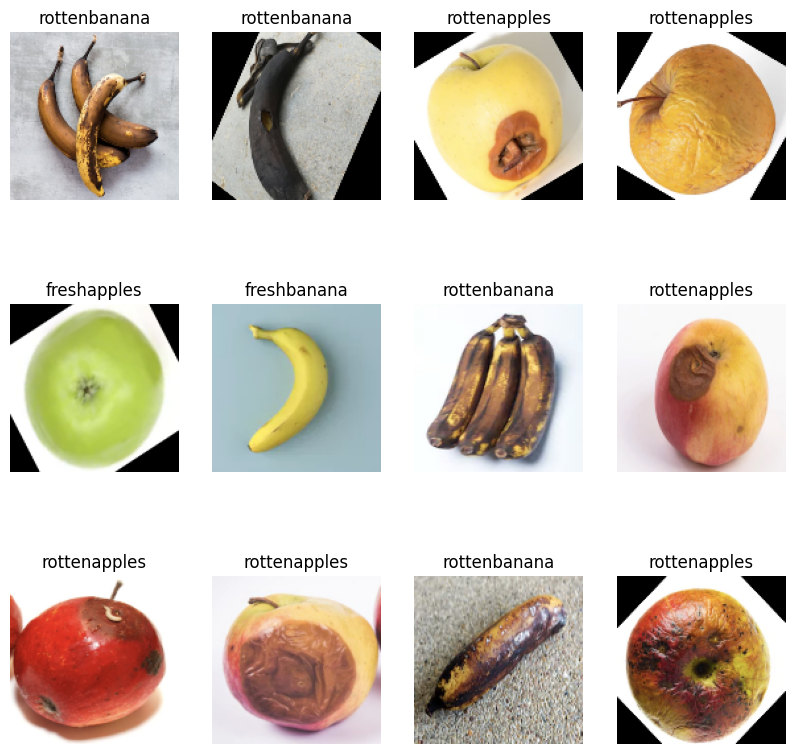

In [ ]:
import matplotlib.pyplot as plt
class_names = dataset.class_names

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
print("Train dataset :" , len(train_ds))
print("Validation dataset :" , len(val_ds))
print("Test dataset :" , len(test_ds))


Train dataset : 245
Validation dataset : 30
Test dataset : 32


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import models,layers
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(image_width,image_height),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    # This layer randomly flips images horizontally or vertically during training. It introduces variability to the dataset, preventing the model from becoming too sensitive to the orientation of objects.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
# data is efficiently loaded in the background during model training.

In [ ]:
train_ds.class_indices

AttributeError: ignored